## Marketing Strategy Analysis (ROI)

### Content
1. Introduction
2. Data Loading and Quality 
3. Feature Additions and Engineering
4. Exploratory Data Analysis and Statistical Analysis
5. Final Recommendations (Optimal Sales)

### Objective
- What is the impact of each marketing strategy and sales visit on Sales (Amount Collected)?
- Is the same strategy valid for all the different client types ?


### Data Loading and Quality Checks

In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [138]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is CCCD-CCBC

 Directory of c:\Users\NazmulHossen\marketing-analytics

03/19/2025  08:57 AM    <DIR>          .
03/17/2025  12:19 PM    <DIR>          ..
03/17/2025  12:14 PM           265,653 Campaign-Data.csv
03/19/2025  08:57 AM               561 consolidated_summary.csv
03/17/2025  12:19 PM            11,558 LICENSE
03/17/2025  12:14 PM           160,067 Marketing_Strategy.ipynb
03/17/2025  12:19 PM                21 README.md
               5 File(s)        437,860 bytes
               2 Dir(s)  262,297,690,112 bytes free


In [139]:
df=pd.read_csv('Campaign-Data.csv')
df.columns

Index(['Client ID', 'Client Type', 'Number of Customers', 'Montly Target',
       'Zip Code', 'Calendardate', 'Amount Collected', 'Unit Sold',
       'Campaign (Email)', 'Campaign (Flyer)', 'Campaign (Phone)',
       'Sales Contact 1', 'Sales Contact 2', 'Sales Contact 3',
       'Sales Contact 4', 'Sales Contact 5', 'Number of Competition'],
      dtype='object')

In [140]:
df.head()

,Client ID,Client Type,Number of Customers,Montly Target,Zip Code,Calendardate,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Number of Competition
0,ID-987275,Medium Facility,2800,125,1003,16-01-2014,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
1,ID-987275,Medium Facility,2800,125,1003,16-02-2014,3409460,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,322500.0,Low
2,ID-987275,Medium Facility,2800,125,1003,18-03-2014,10228384,75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
3,ID-987275,Medium Facility,2800,125,1003,18-04-2014,17047304,123,0.0,0.0,0.0,0.0,3547500.0,1290000.0,0.0,0.0,Low
4,ID-987275,Medium Facility,2800,125,1003,19-05-2014,23866224,171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low


### Feature Engineering

In [141]:
## Creation of Additional Features 
df['Calendardate']=pd.to_datetime(df['Calendardate'])
df['Calendar_Month']=df['Calendardate'].dt.month
df['Calendar_Year']=df['Calendardate'].dt.year

C:\Users\NazmulHossen\AppData\Local\Temp\ipykernel_8256\1823273942.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Calendardate']=pd.to_datetime(df['Calendardate'])


In [142]:
df.head()

,Client ID,Client Type,Number of Customers,Montly Target,Zip Code,Calendardate,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Number of Competition,Calendar_Month,Calendar_Year
0,ID-987275,Medium Facility,2800,125,1003,2014-01-16,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,1,2014
1,ID-987275,Medium Facility,2800,125,1003,2014-02-16,3409460,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,322500.0,Low,2,2014
2,ID-987275,Medium Facility,2800,125,1003,2014-03-18,10228384,75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,3,2014
3,ID-987275,Medium Facility,2800,125,1003,2014-04-18,17047304,123,0.0,0.0,0.0,0.0,3547500.0,1290000.0,0.0,0.0,Low,4,2014
4,ID-987275,Medium Facility,2800,125,1003,2014-05-19,23866224,171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,5,2014


In [143]:
df.drop(['Client ID'],axis=1,inplace=True)


In [144]:
df.drop(['Calendardate'],axis=1,inplace=True)

In [145]:
df.head()

,Client Type,Number of Customers,Montly Target,Zip Code,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Number of Competition,Calendar_Month,Calendar_Year
0,Medium Facility,2800,125,1003,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,1,2014
1,Medium Facility,2800,125,1003,3409460,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,322500.0,Low,2,2014
2,Medium Facility,2800,125,1003,10228384,75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,3,2014
3,Medium Facility,2800,125,1003,17047304,123,0.0,0.0,0.0,0.0,3547500.0,1290000.0,0.0,0.0,Low,4,2014
4,Medium Facility,2800,125,1003,23866224,171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,5,2014


In [146]:
_label=LabelEncoder()
df['Client Type']=_label.fit_transform(df['Client Type'])
df['Number of Competition']=_label.fit_transform(df['Number of Competition'])

In [147]:
df.head()

,Client Type,Number of Customers,Montly Target,Zip Code,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Number of Competition,Calendar_Month,Calendar_Year
0,1,2800,125,1003,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,2014
1,1,2800,125,1003,3409460,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,322500.0,1,2,2014
2,1,2800,125,1003,10228384,75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3,2014
3,1,2800,125,1003,17047304,123,0.0,0.0,0.0,0.0,3547500.0,1290000.0,0.0,0.0,1,4,2014
4,1,2800,125,1003,23866224,171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5,2014


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Client Type            2976 non-null   int64  
 1   Number of Customers    2976 non-null   int64  
 2   Montly Target          2976 non-null   int64  
 3   Zip Code               2976 non-null   int64  
 4   Amount Collected       2976 non-null   int64  
 5   Unit Sold              2976 non-null   int64  
 6   Campaign (Email)       2976 non-null   float64
 7   Campaign (Flyer)       2976 non-null   float64
 8   Campaign (Phone)       2976 non-null   float64
 9   Sales Contact 1        2976 non-null   float64
 10  Sales Contact 2        2976 non-null   float64
 11  Sales Contact 3        2976 non-null   float64
 12  Sales Contact 4        2976 non-null   float64
 13  Sales Contact 5        2976 non-null   float64
 14  Number of Competition  2976 non-null   int64  
 15  Cale

In [149]:
df.corr()

,Client Type,Number of Customers,Montly Target,Zip Code,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Number of Competition,Calendar_Month,Calendar_Year
Client Type,1.000000e+00,-3.005827e-01,-3.015242e-01,NaN,-0.286855,-0.286961,-0.092799,-0.197822,-0.053464,-0.062039,-0.193134,-0.248018,-0.132838,-0.073298,-1.535213e-16,1.833594e-16,4.553562e-13
Number of Customers,-3.005827e-01,1.000000e+00,9.755652e-01,NaN,0.607496,0.607433,0.308829,0.392804,0.034045,0.306494,0.603382,0.526118,0.139936,0.160106,1.903273e-18,-2.525610e-16,2.651324e-14
Montly Target,-3.015242e-01,9.755652e-01,1.000000e+00,NaN,0.608204,0.608205,0.303715,0.392718,0.033320,0.303154,0.606399,0.523733,0.142446,0.156679,-3.754372e-18,-1.943609e-16,7.797249e-14
Zip Code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount Collected,-2.868553e-01,6.074959e-01,6.082040e-01,NaN,1.000000,0.997515,0.248235,0.444337,0.034858,0.277478,0.552112,0.357887,0.236165,0.095795,-1.883804e-01,1.394255e-01,2.861939e-01
Unit Sold,-2.869606e-01,6.074333e-01,6.082052e-01,NaN,0.997515,1.000000,0.248654,0.448744,0.035318,0.275878,0.555373,0.356736,0.232857,0.095808,-1.894495e-01,1.397321e-01,2.891124e-01
Campaign (Email),-9.279942e-02,3.088290e-01,3.037153e-01,NaN,0.248235,0.248654,1.000000,0.193791,0.014099,0.266377,0.236874,0.178171,0.079366,0.071325,2.343698e-02,4.262989e-02,7.054998e-03
Campaign (Flyer),-1.978218e-01,3.928040e-01,3.927179e-01,NaN,0.444337,0.448744,0.193791,1.000000,0.006191,0.172554,0.349145,0.290652,0.056381,0.092728,-7.990675e-02,1.549005e-01,1.207313e-01
Campaign (Phone),-5.346362e-02,3.404528e-02,3.332045e-02,NaN,0.034858,0.035318,0.014099,0.006191,1.000000,0.081151,0.002027,0.073234,0.008415,0.015859,-1.799902e-02,-3.824878e-02,5.484606e-02
Sales Contact 1,-6.203891e-02,3.064945e-01,3.031538e-01,NaN,0.277478,0.275878,0.266377,0.172554,0.081151,1.000000,0.173196,-0.008739,0.184894,0.014422,-6.744602e-03,-2.160138e-02,7.603533e-02


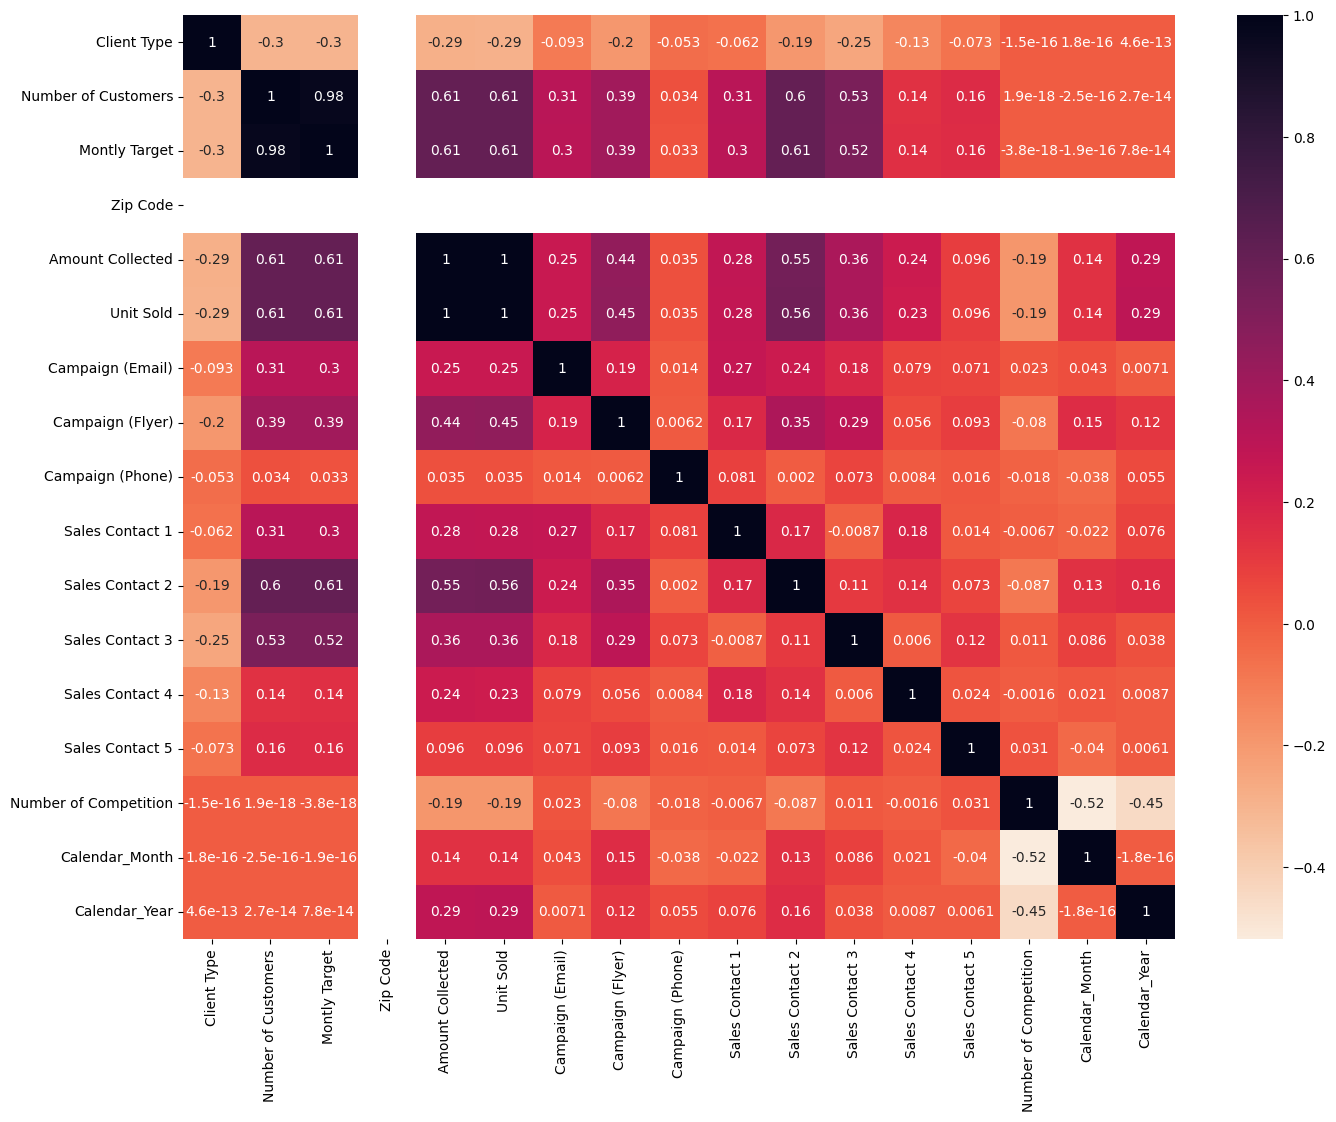

In [150]:

plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True,cmap="rocket_r")
plt.show()

In [151]:
df_stat = df.copy()

In [152]:
df_stat['Monthly-Performance'] = (df_stat['Unit Sold'] / df_stat['Montly Target'])*100

In [153]:
df_stat['Monthly-Performance'].head()

0      0.0
1     19.2
2     60.0
3     98.4
4    136.8
Name: Monthly-Performance, dtype: float64

In [154]:
df_stat.head()

,Client Type,Number of Customers,Montly Target,Zip Code,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Number of Competition,Calendar_Month,Calendar_Year,Monthly-Performance
0,1,2800,125,1003,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,2014,0.0
1,1,2800,125,1003,3409460,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,322500.0,1,2,2014,19.2
2,1,2800,125,1003,10228384,75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3,2014,60.0
3,1,2800,125,1003,17047304,123,0.0,0.0,0.0,0.0,3547500.0,1290000.0,0.0,0.0,1,4,2014,98.4
4,1,2800,125,1003,23866224,171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5,2014,136.8


### Exploratory Data Analysis and Statistical Analysis

<b> Exploring and Understanding basics data </b>

1. Distribution of Data across different accounts
2. Difference of Sales in Account Types

<b> Statistical Analysis - Answering the Questions</b>
1. Impact of Marketing Strategy on Sales (Using Correlation, Regression)
2. Impact of Competition on Sales
3. How different types of client can have different strategies

### Impact of Marketing Strategy on Sales 

#### Understanding data distrubtions

In [155]:
df['Client Type'].value_counts(normalize=True)

Client Type
0    0.459677
3    0.282258
1    0.169355
2    0.088710
Name: proportion, dtype: float64

In [156]:
pd.crosstab(df['Number of Competition'],df['Client Type'],margins=True,normalize='columns')

Client Type,0,1,2,3,All
Number of Competition,,,,,
0,0.166667,0.166667,0.166667,0.166667,0.166667
1,0.833333,0.833333,0.833333,0.833333,0.833333


In [157]:
df.groupby('Number of Competition').mean(numeric_only=True)

,Client Type,Number of Customers,Montly Target,Zip Code,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Calendar_Month,Calendar_Year
Number of Competition,,,,,,,,,,,,,,,,
0,1.193548,1456.935484,75.080645,1003.0,2.974789e+07,213.127016,105398.938508,994046.717540,45198.036895,146945.564516,2.685333e+06,1.786754e+06,72172.379032,8452.620968,10.5,2015.0
1,1.193548,1456.935484,75.080645,1003.0,1.445570e+07,103.132258,150862.165766,623692.979839,26693.304194,128219.758065,1.890916e+06,1.883634e+06,70481.854839,15864.919355,5.7,2014.4


In [158]:
df.groupby('Client Type').mean(numeric_only=True)

,Number of Customers,Montly Target,Zip Code,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Number of Competition,Calendar_Month,Calendar_Year
Client Type,,,,,,,,,,,,,,,,
0,1380.842105,71.578947,1003.0,1.999880e+07,143.098684,142273.609649,8.192056e+05,45595.436623,133667.763158,2.034013e+06,2.017039e+06,119287.280702,16266.447368,0.833333,6.5,2014.5
1,3940.761905,202.857143,1003.0,4.075997e+07,290.583333,437217.097817,1.552603e+06,49176.847619,398645.833333,4.822783e+06,4.698646e+06,85104.166667,33273.809524,0.833333,6.5,2014.5
2,400.727273,20.454545,1003.0,5.030246e+06,35.784091,5183.715152,2.272919e+05,5522.470455,1221.590909,6.376705e+05,4.434375e+05,3664.772727,12215.909091,0.833333,6.5,2014.5
3,422.514286,21.285714,1003.0,1.637759e+06,11.689286,11975.986310,9.120875e+04,0.000000,8062.500000,7.617143e+05,3.727946e+05,4223.214286,1535.714286,0.833333,6.5,2014.5


## Correlation Analysis

In [159]:
# Extract correlations for 'Amount_Collected'
amount_collected_corr = df.corr()[['Amount Collected']]

# Display the result
print(amount_collected_corr)

                       Amount Collected
Client Type                   -0.286855
Number of Customers            0.607496
Montly Target                  0.608204
Zip Code                            NaN
Amount Collected               1.000000
Unit Sold                      0.997515
Campaign (Email)               0.248235
Campaign (Flyer)               0.444337
Campaign (Phone)               0.034858
Sales Contact 1                0.277478
Sales Contact 2                0.552112
Sales Contact 3                0.357887
Sales Contact 4                0.236165
Sales Contact 5                0.095795
Number of Competition         -0.188380
Calendar_Month                 0.139425
Calendar_Year                  0.286194


In [160]:


# Extract correlations for 'Amount Collected'
amount_collected_corr = df.corr()[['Amount Collected']]

# Rename the column for better readability
amount_collected_corr.columns = ['Correlation with Amount Collected']

# Sort the correlations in descending order
amount_collected_corr = amount_collected_corr.sort_values(by='Correlation with Amount Collected', ascending=False)

# Remove the row for 'Amount Collected' (correlation with itself is always 1)
amount_collected_corr = amount_collected_corr[amount_collected_corr.index != 'Amount Collected']

# Apply a color gradient for better visualization
cm = sns.light_palette("green", as_cmap=True)
styled_corr = amount_collected_corr.style.background_gradient(cmap=cm).format("{:.2f}")

# Display the styled DataFrame
styled_corr

,Correlation with Amount Collected
Unit Sold,1.00
Montly Target,0.61
Number of Customers,0.61
Sales Contact 2,0.55
Campaign (Flyer),0.44
Sales Contact 3,0.36
Calendar_Year,0.29
Sales Contact 1,0.28
Campaign (Email),0.25
Sales Contact 4,0.24


In [161]:
amount_collected_corr = df.groupby('Client Type').corr()[['Amount Collected']]

# Rename the column for better readability
amount_collected_corr.columns = ['Correlation with Amount Collected']

# Sort the correlations in descending order
amount_collected_corr = amount_collected_corr.sort_values(by='Correlation with Amount Collected', ascending=False)

# Remove the row for 'Amount Collected' (correlation with itself is always 1)
amount_collected_corr = amount_collected_corr[amount_collected_corr.index != 'Amount Collected']

# Apply a color gradient for better visualization
cm = sns.light_palette("green", as_cmap=True)
styled_corr = amount_collected_corr.style.background_gradient(cmap=cm).format("{:.2f}")

# Display the styled DataFrame
styled_corr

#### Market Strategy Impact on Sales by different account type

In [162]:
# Initialize an empty list to store the results
results = []

# Group by 'Client Type'
for client_type, group in df.groupby('Client Type'):
    # Calculate the correlation of each feature with 'Amount Collected'
    corr = group.corr()['Amount Collected'].drop('Amount Collected')
    
    # Append the results to the list
    for variable, impact in corr.items():
        results.append({
            'Acc Type': client_type,
            'Variable Impact on Sales': variable,
            'Impact': impact
        })

# Convert the list to a DataFrame
correlation_analysis = pd.DataFrame(results)

# Sort by 'Acc Type' and 'Impact'
correlation_analysis = correlation_analysis.sort_values(by=['Acc Type', 'Impact'], ascending=[True, False])

# Apply a color gradient for better visualization
cm = sns.light_palette("green", as_cmap=True)
styled_corr = correlation_analysis.style.background_gradient(cmap=cm, subset=['Impact']).format({"Impact": "{:.2f}"})

# Display the styled DataFrame
styled_corr

,Acc Type,Variable Impact on Sales,Impact
4,0,Unit Sold,1.00
2,0,Montly Target,0.52
1,0,Number of Customers,0.50
9,0,Sales Contact 2,0.42
15,0,Calendar_Year,0.34
6,0,Campaign (Flyer),0.32
8,0,Sales Contact 1,0.29
11,0,Sales Contact 4,0.28
10,0,Sales Contact 3,0.19
14,0,Calendar_Month,0.15


## Regression Analysis (Market Sales and Strategies)

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Assuming 'data' is your DataFrame
# Clean column names (replace spaces and remove parentheses)
df.columns = [col.replace(" ", "_").replace("(", "").replace(")", "") for col in df.columns]

# Define independent variables (X) and dependent variable (y)
X = df[['Campaign_Email', 'Campaign_Flyer', 'Campaign_Phone', 
          'Sales_Contact_1', 'Sales_Contact_2', 'Sales_Contact_3', 
          'Sales_Contact_4', 'Sales_Contact_5']]
y = df['Amount_Collected']

# Add a constant to the independent variables (for the intercept)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Amount_Collected   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     342.1
Date:                Wed, 19 Mar 2025   Prob (F-statistic):               0.00
Time:                        08:25:10   Log-Likelihood:                -54512.
No. Observations:                2976   AIC:                         1.090e+05
Df Residuals:                    2967   BIC:                         1.091e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.481e+06   5.12e+05     

In [ ]:
coefficients = model.params

# Convert the coefficients to a DataFrame
coef_df = pd.DataFrame({
    'index': coefficients.index,  # Get the variable names (index)
    'coef': coefficients.values  # Get the coefficient values
})

# Reset the index (optional, for better readability)
coef_df = coef_df.reset_index(drop=True)

# Display the DataFrame
print(coef_df)

             index          coef
0            const  1.481206e+06
1   Campaign_Email  7.932022e-01
2   Campaign_Flyer  3.337560e+00
3   Campaign_Phone  7.336071e-02
4  Sales_Contact_1  4.236796e+00
5  Sales_Contact_2  3.638215e+00
6  Sales_Contact_3  2.343240e+00
7  Sales_Contact_4  1.094783e+01
8  Sales_Contact_5  3.507795e+00


In [ ]:
coefficients = model.params
p_values = model.pvalues

# Combine coefficients and p-values into a DataFrame
results_df = pd.DataFrame({
    'index': coefficients.index,  # Variable names
    'coef': coefficients.values,  # Coefficient values
    'p_value': p_values.values    # P-values
})

# Filter rows where p-value < 0.05
significant_results = results_df[results_df['p_value'] < 0.05]

# Drop the 'p_value' column (optional, if you don't need it in the final output)
significant_results = significant_results.drop(columns=['p_value'])

# Reset the index (optional, for better readability)
significant_results = significant_results.reset_index(drop=True)

# Display the filtered DataFrame
print(significant_results)

             index          coef
0            const  5.681904e+06
1   Campaign_Flyer  4.105889e+00
2  Sales_Contact_1  3.136485e+00
3  Sales_Contact_2  3.577820e+00
4  Sales_Contact_3  2.117403e+00


### Regression Analysis (Market Sales and Strategies) by splitting different account type

In [ ]:
df.columns = [col.replace(" ", "_").replace("(", "").replace(")", "") for col in df.columns]

# Initialize an empty DataFrame to store consolidated results
consolidated_summary = pd.DataFrame()

# Loop through each unique Client_Type
for acctype in df['Client_Type'].unique():
    # Filter data for the current Client_Type
    temp_data = df[df['Client_Type'] == acctype].copy()
    
    # Define independent variables (X) and dependent variable (y)
    X = temp_data[['Campaign_Email', 'Campaign_Flyer', 'Campaign_Phone', 
                   'Sales_Contact_1', 'Sales_Contact_2', 'Sales_Contact_3', 
                   'Sales_Contact_4', 'Sales_Contact_5']]
    y = temp_data['Amount_Collected']
    
    # Add a constant to the independent variables (for the intercept)
    X = sm.add_constant(X)
    
    # Fit the OLS model
    model = sm.OLS(y, X).fit()
    
    # Extract coefficients and p-values
    results_df = pd.DataFrame({
        'Variable': model.params.index,  # Variable names
        'Coefficient (Impact)': model.params.values,  # Coefficient values
        'P>|t|': model.pvalues.values  # P-values
    })
    
    # Filter rows where p-value < 0.05 and exclude the intercept
    results_df = results_df[(results_df['P>|t|'] < 0.05) & (results_df['Variable'] != 'const')]
    
    # Add the Account Type column
    results_df['Account Type'] = acctype
    
    # Sort by coefficient value (descending)
    results_df = results_df.sort_values('Coefficient (Impact)', ascending=False)
    
    # Append to the consolidated summary
    consolidated_summary = pd.concat([consolidated_summary, results_df], ignore_index=True)

    
    # Print the current Account Type and results
    print(f"Account Type: {acctype}")
    print(results_df)
    print("\n")

# Display the consolidated summary
print("Consolidated Summary:")
print(consolidated_summary)

Account Type: 1
          Variable  Coefficient (Impact)         P>|t|  Account Type
2   Campaign_Flyer              4.105889  8.893110e-09             1
5  Sales_Contact_2              3.577820  3.717345e-28             1
4  Sales_Contact_1              3.136485  2.204391e-05             1
6  Sales_Contact_3              2.117403  2.784735e-12             1


Account Type: 0
          Variable  Coefficient (Impact)         P>|t|  Account Type
4  Sales_Contact_1             11.673076  2.968636e-20             0
7  Sales_Contact_4             10.614502  9.180557e-17             0
5  Sales_Contact_2              4.003122  3.331206e-57             0
2   Campaign_Flyer              2.720412  1.937321e-14             0
6  Sales_Contact_3              2.031615  3.266207e-16             0
3   Campaign_Phone             -3.536085  8.070200e-03             0


Account Type: 3
          Variable  Coefficient (Impact)         P>|t|  Account Type
5  Sales_Contact_2              0.810063  7.940431e

## Summary and Recommendations

#### Prioritize Campaign_Flyer and Sales_Contact_2 for most client types.

#### Tailor strategies based on client type (focus on Sales_Contact_4 for Large Facilities).

#### Discontinue or refine low-ROI strategies like Campaign_Phone and Campaign_Email.

#### Address competitive markets by adopting differentiated strategies.

In [ ]:
consolidated_summary

,Variable,Coefficient (Impact),P>|t|,Account Type
0,Campaign_Flyer,4.105889,8.893110e-09,1
1,Sales_Contact_2,3.577820,3.717345e-28,1
2,Sales_Contact_1,3.136485,2.204391e-05,1
3,Sales_Contact_3,2.117403,2.784735e-12,1
4,Sales_Contact_1,11.673076,2.968636e-20,0
5,Sales_Contact_4,10.614502,9.180557e-17,0
6,Sales_Contact_2,4.003122,3.331206e-57,0
7,Campaign_Flyer,2.720412,1.937321e-14,0
8,Sales_Contact_3,2.031615,3.266207e-16,0
9,Campaign_Phone,-3.536085,8.070200e-03,0


In [ ]:
#consolidated_summary.reset_index(inplace=True)
dropped_con_summary = consolidated_summary.drop(['P>|t|'],inplace=True,axis=1)

In [ ]:
dropped_con_summary

In [ ]:
# Drop the 'P>|t|' column
#consolidated_summary = consolidated_summary.drop(columns=['P>|t|'])

# Rename the columns
consolidated_summary.columns = ['Variable', 'Return on Investment', 'Account Type']

# Round the 'Return on Investment' column to 1 decimal place
consolidated_summary['Return on Investment'] = consolidated_summary['Return on Investment'].apply(lambda x: round(x, 1))

# Apply a color gradient to the DataFrame
styled_summary = consolidated_summary.style.background_gradient(cmap='RdYlGn')

# Display the styled DataFrame
styled_summary

,Variable,Return on Investment,Account Type
0,Campaign_Flyer,4.100000,1
1,Sales_Contact_2,3.600000,1
2,Sales_Contact_1,3.100000,1
3,Sales_Contact_3,2.100000,1
4,Sales_Contact_1,11.700000,0
5,Sales_Contact_4,10.600000,0
6,Sales_Contact_2,4.000000,0
7,Campaign_Flyer,2.700000,0
8,Sales_Contact_3,2.000000,0
9,Campaign_Phone,-3.500000,0


In [ ]:
def format(x):
        return "${:.1f}".format(x)
consolidated_summary['Return on Investment']  = consolidated_summary['Return on Investment'].apply(format)

In [ ]:
consolidated_summary.columns = ['Variable','Return on Investment','Account Type']
consolidated_summary.style.background_gradient(cmap='RdYlGn')

,Variable,Return on Investment,Account Type
0,Campaign_Flyer,$4.1,1
1,Sales_Contact_2,$3.6,1
2,Sales_Contact_1,$3.1,1
3,Sales_Contact_3,$2.1,1
4,Sales_Contact_1,$11.7,0
5,Sales_Contact_4,$10.6,0
6,Sales_Contact_2,$4.0,0
7,Campaign_Flyer,$2.7,0
8,Sales_Contact_3,$2.0,0
9,Campaign_Phone,$-3.5,0


In [ ]:
account_type_mapping = {
    1: 'Medium Facility',
    0: 'Large Facility',
    3: 'Small Facility',
    2: 'Private Facility'
}

# Replace numerical values with real names
consolidated_summary['Account Type'] = consolidated_summary['Account Type'].replace(account_type_mapping)
consolidated_summary.style.background_gradient(cmap='RdYlGn')

,Variable,Return on Investment,Account Type
0,Campaign_Flyer,$4.1,Medium Facility
1,Sales_Contact_2,$3.6,Medium Facility
2,Sales_Contact_1,$3.1,Medium Facility
3,Sales_Contact_3,$2.1,Medium Facility
4,Sales_Contact_1,$11.7,Large Facility
5,Sales_Contact_4,$10.6,Large Facility
6,Sales_Contact_2,$4.0,Large Facility
7,Campaign_Flyer,$2.7,Large Facility
8,Sales_Contact_3,$2.0,Large Facility
9,Campaign_Phone,$-3.5,Large Facility


In [ ]:

consolidated_summary.to_csv('consolidated_summary.csv')
